# Penjelasan Kode

### Inisialisai Partikel
membangkitkan 6 partikel ---> 1 partikel 5 kota
```python 
partikels = [[0,1,2,3,4],
     [4,1,2,0,3],
     [4,3,2,0,1],
     [1,4,2,3,0],
     [3,2,1,4,0],
     [2,1,3,4,0]]
#koordinat setiap kota
koor  = [[12,6],[2,8],[10,14],[4,2],[6,2]]
#velocity
v = [[[0,1]],[[1,4]],[[2,4]],[[0,2]],[[3,1]],[[2,3]]]
#menggunakan triple nested list karena setiap partikel memiliki hpp dan setiap hpp terdapat beberapa pp
```
Untuk menghitung pbest dan gbest kita menggunakan fungsi fitness yang menggunakan rumus jarak dari dua titik koordinat kemudian di jumlahkan
$$ d=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}\ $$
```python
def jarak_euclidean(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def hitung_fitness(rute, koordinat):
    total_jarak = 0
    for i in range(len(rute) - 1):
        total_jarak += jarak_euclidean(koordinat[rute[i]], koordinat[rute[i + 1]])
    return total_jarak
```
###### Hitung pi(pbest) jika t=0 (pertama) maka sama dengan x1 
![image.png](attachment:image.png)
```python
pi = partikel.copy()

for k in range(len(partikel)) :
    print(f"f(p({k})) = ",hitung_fitness(partikel[k],koor))
    if hitung_fitness(partikel[k],koor) < hitung_fitness(pi[k],koor):
        pi[k]=partikel[k]
        hasil.append(hitung_fitness(pi[k],koor))
    else:
        hasil.append(hitung_fitness(pi[k],koor))
print(hasil) 
```
###### Mencari gbest dari pi
![image-2.png](attachment:image-2.png)
```python
gbest = pi[hasil.index(min(hasil))]
```

###### Update velocity
$$ v_i(t+1) = c_0v_i(t)+c_1r_1(t)[p_i(t)-x_i(t)]+c_2r_2(t)[p_g(t)-x_1(t)] $$

karena tidak tahu cara perkalian c (konstanta) dan r (elemen stochastic) maka

$$ v_i(t+1) = v_i(t)+[p_i(t)-x_i(t)]+[p_g(t)-x_i(t)] $$

```python

def penguranganPartikel(a,b):
    x = [] #untuk menampung hasil hpp
    c = a.copy() #menyimpan perubahan
    for i in a :
        idx = [c.index(i),b.index(i)] #pp
        if idx[0] != idx[1] and  (idx not in x and idx[::-1] not in x) : #cek apakah sudah perlu pindah dan belum ada di hpp
            x.append([c.index(i),b.index(i)]) # jika belum masukkan
            c[idx[0]],c[idx[1]]=c[idx[1]],c[idx[0]] # dan swap posisi
    return x

for j in range(len(partikel)):
    temp = penguranganPartikel(gbest,partikel[j])
    temp2 = penguranganPartikel(pi[j],partikel[k])
    v[j] = v[j]+ temp+temp2  #penjumlahan velocity
    print(f"v{j+1}({x+1}) = ",v[j])
```

###### Update Partikel
$$ x_i(t+1)=x_i(t)+v_i(t+1) $$
```python
def pertambahanHpp(a,hpp):
    x1 = a.copy()
    for i in hpp:
        x1[i[0]],x1[i[1]] = x1[i[1]],x1[i[0]] #posisi dirubah sesuai dengan hpp
    return x1

for i in range(len(partikel)):
    partikel[i] = pertambahanHpp(partikel[i],v[i])
    print(f"x{i+1}({x+1}) = ",partikel[i])
```

###### Ulangi proses dari pbest lagi secara terus menerus hingga iterasi ke n 

# Code

In [1]:
# Pengurangan Partikel

a = ["A","C","D","B"]
b = ["B","A","D","C"]

def penguranganPartikel(a,b):
    x = [] #untuk menampung hasil hpp
    c = a.copy() #menyimpan perubahan
    for i in a :
        idx = [c.index(i),b.index(i)] #pp
        if idx[0] != idx[1] and  (idx not in x and idx[::-1] not in x) : #cek apakah sudah perlu pindah dan belum ada di hpp
            x.append([c.index(i),b.index(i)]) # jika belum masukkan
            c[idx[0]],c[idx[1]]=c[idx[1]],c[idx[0]] # dan swap posisi
    return x
# print(a)
# penguranganPartikel(a,b)



[[0, 2], [1, 0], [1, 3], [1, 4]]


In [3]:
# pertambahan patikel dengan PP
def pertambahanPP(a,pp):
    X1 = a.copy()

    X1[pp[0]],X1[pp[1]] = X1[pp[1]],X1[pp[0]]
    return X1

pp = [0,2]
pertambahanPP(a,pp)

['D', 'C', 'A', 'B']

In [4]:
# Pertambahan Partikel dengan HPP
hpp = [[0, 2], [1, 2],[0,3]]
def pertambahanHpp(a,hpp):
    x1 = a.copy()
    for i in hpp:
        x1[i[0]],x1[i[1]] = x1[i[1]],x1[i[0]]
    return x1

pertambahanHpp(a,hpp)

['B', 'A', 'C', 'D']

In [5]:
# Pertambahan hpp dengan hpp

hpp1 = [[0, 2], [1, 2],[0,3]]
hpp2 = [[3, 1], [2, 0]]
print(hpp1+hpp2)

[[0, 2], [1, 2], [0, 3], [3, 1], [2, 0]]


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

x1 = n [0, 1, 2, 3, 4]
x2 = n [4, 1, 2, 0, 3]
x3 = n [4, 3, 2, 0, 1]
x4 = n [1, 4, 2, 3, 0]
x5 = n [3, 2, 1, 4, 0]
x6 = n [2, 1, 3, 4, 0]

Fitness :
f(p(0)) =  42.82554944311228
f(p(1)) =  36.40158571216246
f(p(2)) =  41.0717606943476
f(p(3)) =  52.418931993784966
f(p(4)) =  46.782884876853856
f(p(5)) =  33.78186912250006
[42.82554944311228, 36.40158571216246, 41.0717606943476, 52.418931993784966, 46.782884876853856, 33.78186912250006]
gbest 33.78186912250006 => [2, 1, 3, 4, 0]

Update Velocity :
v1(1) =  [[0, 1], [0, 2], [0, 3], [0, 4], [0, 4], [2, 0], [3, 2]]
v2(1) =  [[1, 4], [0, 2], [0, 4], [3, 0], [0, 3], [2, 0], [2, 4]]
v3(1) =  [[2, 4], [0, 2], [1, 4], [0, 1], [3, 0], [0, 3], [1, 2], [1, 0], [1, 4]]
v4(1) =  [[0, 2], [0, 2], [1, 0], [1, 3], [0, 1], [0, 3], [2, 0]]
v5(1) =  [[3, 1], [0, 1], [0, 2], [0, 2], [1, 0]]
v6(1) =  [[2, 3]]

Update Partikel :
x1(1) =  [1, 0, 2, 3, 4]
x2(1) =  [4, 3, 2, 0, 1]
x3(1) =  [4, 3, 1, 0, 2]
x4(1) =  [2, 4, 1, 3, 0]
x5(1) =  [3, 4, 1, 2, 0]
x6(1) 

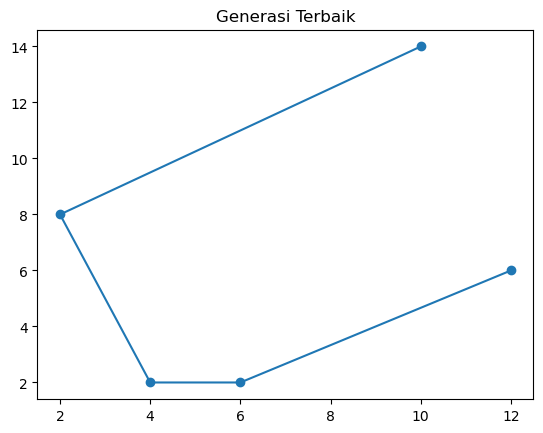

In [20]:
partikel = [[0,1,2,3,4],
     [4,1,2,0,3],
     [4,3,2,0,1],
     [1,4,2,3,0],
     [3,2,1,4,0],
     [2,1,3,4,0]]
koor  = [[12,6],[2,8],[10,14],[4,2],[6,2]]
v = [[[0,1]],[[1,4]],[[2,4]],[[0,2]],[[3,1]],[[2,3]]]
pi = partikel.copy()

import math

for i,x in enumerate(partikel) :
    print(f"x{i+1} = n",x)

def jarak_euclidean(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def hitung_fitness(rute, koordinat):
    total_jarak = 0
    for i in range(len(rute) - 1):
        total_jarak += jarak_euclidean(koordinat[rute[i]], koordinat[rute[i + 1]])
    total_jarak += jarak_euclidean(koordinat[rute[-1]], koordinat[rute[0]])
    return total_jarak

for x in range(3):
    hasil = []
    print("\nFitness :")
    for k in range(len(partikel)) :
        print(f"f(p({k})) = ",hitung_fitness(partikel[k],koor))
        if hitung_fitness(partikel[k],koor) < hitung_fitness(pi[k],koor):
            pi[k]=partikel[k]
            hasil.append(hitung_fitness(pi[k],koor))
        else:
            hasil.append(hitung_fitness(pi[k],koor))
    print(hasil) 
    gbest = pi[hasil.index(min(hasil))]
    print("gbest",min(hasil),"=>",gbest)
    print("\nUpdate Velocity :")
    for j in range(len(partikel)):
        temp = penguranganPartikel(gbest,partikel[j])
        temp2 = penguranganPartikel(pi[j],partikel[k])
        v[j] = v[j]+ temp+temp2
        print(f"v{j+1}({x+1}) = ",v[j])

    print("\nUpdate Partikel :")
    for i in range(len(partikel)):

        partikel[i] = pertambahanHpp(partikel[i],v[i])
        print(f"x{i+1}({x+1}) = ",partikel[i])

x_plt = []
y_plt = []
for t in gbest:
    x_plt.append(koor[t][0])
    y_plt.append(koor[t][1])
plt.plot(x_plt,y_plt,marker="o")
plt.title("Generasi Terbaik")
plt.show()
    

    


In [25]:
hpp = [[0,2],[0,1],[4,1],[3,4]]
4,3,2,1,0
2,3,4,1,0
3,2,4,1,0
3,0,4,1,2
3,0,4,2,1




0


In [2]:
a = [4,3,2,1,0]
b = [3,0,4,2,1]
hasil = penguranganPartikel(a,b)
print(hasil)

[[0, 2], [1, 0], [1, 3], [1, 4]]


In [ ]:
hpp = [[0,4],[1,3]]
3,2,4,1,0
0,2,4,1,3
0,1,4,2,3



In [3]:
a= [3,2,4,1,0]
b= [0,1,4,2,3]
hasil = penguranganPartikel(a,b)
print(hasil)

[[0, 4], [1, 3]]
